In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [13]:
#Load the data
x = np.load('./X_medium.npy', allow_pickle=True)
y = np.load('./y_medium.npy', allow_pickle=True)
np.nan_to_num(x,0)

array([[ 7.23267436e-01,  9.76336300e-02,  3.12463820e-01, ...,
        -3.40898895e+01, -1.90405730e-01,  7.56735291e-02],
       [ 4.27478582e-01,  9.25289914e-02,  3.04185778e-01, ...,
        -2.65414467e+01,  3.31592578e-02, -1.66823928e-01],
       [ 5.37877202e-01,  8.07771459e-02,  2.84213215e-01, ...,
        -3.02505894e+01,  1.13161338e-01,  2.41499572e-01],
       ...,
       [ 3.03386003e-01,  6.09684065e-02,  2.46917814e-01, ...,
        -1.99380951e+01, -1.42457879e-01, -1.40062005e-01],
       [ 6.37709737e-01,  9.93302912e-02,  3.15167099e-01, ...,
        -3.25693130e+01,  1.16358214e-01,  4.11841093e-01],
       [ 4.59266275e-01,  4.83287238e-02,  2.19837949e-01, ...,
        -2.27927513e+01, -3.25676319e-02,  2.73381908e-01]])

In [14]:

X_train, XX, y_train, YY = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(XX, YY, test_size=0.5,random_state=42, stratify=YY )

scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)
scaler.transform(X_val)

array([[ 9.12200298e-01,  1.77002995e+00,  1.59393689e+00, ...,
         6.39784743e-01,  1.05302713e+00,  1.37298876e+00],
       [ 4.51698147e-02, -5.83261596e-01, -5.03737510e-01, ...,
         5.16997835e-01, -8.63740793e-01, -4.50090975e-01],
       [-7.18486587e-01,  7.14652754e-01,  7.40327541e-01, ...,
        -1.02741462e+00, -1.45694027e-01, -4.47794062e-01],
       ...,
       [-1.94513741e-01,  3.60673421e-01,  4.26775886e-01, ...,
        -8.83249585e-02,  8.98110217e-02, -3.60624383e-01],
       [ 7.38860519e-04,  6.10680709e-01,  6.49875253e-01, ...,
         4.15235917e-01,  3.08079122e-01, -3.17585478e-01],
       [ 4.07992630e-01,  5.17739786e-01,  5.67887853e-01, ...,
         9.76542884e-01, -2.78291235e-01, -4.30085386e-02]])

In [15]:

all_score = []
all_k = []
for k in range(1,328,2):
 clf  = KNeighborsClassifier(n_neighbors=k)
 clf.fit(X_train, y_train)
 score = clf.score(X_val, y_val)
 all_score.append(score)
 all_k.append(k)

all_score = np.array(all_score)
all_k = np.array(all_k)

In [16]:
K = all_k[np.argmax(all_score)]
print(K)
np.max(all_score)


9


0.576861489191353

In [17]:
#final testing and final model
clf  = KNeighborsClassifier(n_neighbors=K)
clf .fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.5744595676541233

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 57.45%
Classification Report:
                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00         7
          Classical       0.44      0.74      0.55        62
            Country       0.38      0.35      0.36        17
     Easy Listening       0.00      0.00      0.00         2
         Electronic       0.65      0.54      0.59       631
       Experimental       0.46      0.14      0.22       225
               Folk       0.49      0.56      0.52       152
            Hip-Hop       0.44      0.72      0.54       219
       Instrumental       0.50      0.22      0.31       135
      International       0.55      0.51      0.53       102
               Jazz       0.25      0.13      0.17        39
Old-Time / Historic       0.96      0.98      0.97        51
                Pop       0.35      0.07      0.11       119
               Rock       0.62      0.86      0.73       710
           Soul-RnB       0.00      0.00    

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

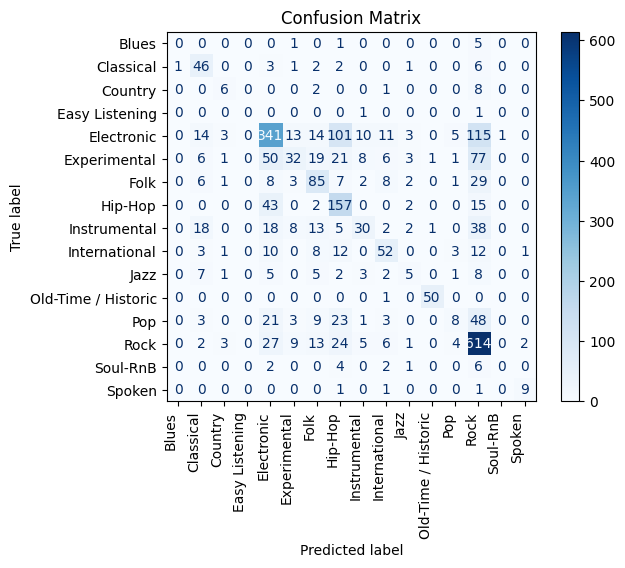

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

#class_names = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',  'Pop', 'Rock']
class_names = ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken' ]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha='right')
plt.title("Confusion Matrix")
plt.show()


In [22]:
from joblib import dump
# Save model
dump(clf, 'models/KN_medium_model.joblib')

['models/KN_medium_model.joblib']

In [23]:
from datapreprosessing import *

def classify_genre(audio_path):
    
    features = extract_features(audio_path) 
    features = features.reshape(1, -1)
    genre= clf.predict(features)[0]
    return genre

d = classify_genre('fma_small/000/000002.mp3')
print(d)

Electronic
